<x>      = 1.40000000
<y>      = 0.10000000
<y|x>    = [-0.5  1. ]
<x|y>    = [1.25 1.4  2.  ]
Cov[x,y] = 0.36000000
H[x,y]   = 2.17095059
H[x]     = 0.97095059
H[y]     = 1.36096405
H[y|x]   = 1.20000000
H[x|y]   = 0.80998655
I(x,y)   = 0.16096405


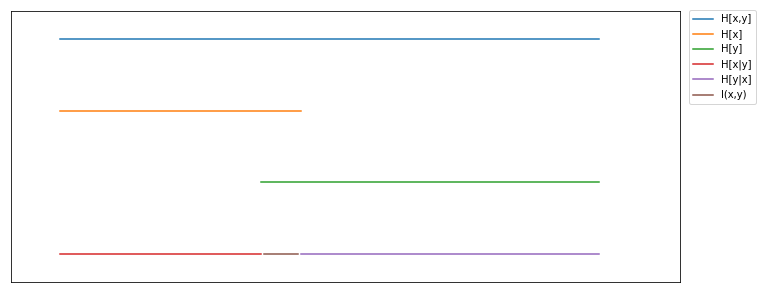

In [73]:
import numpy as np
import matplotlib.pyplot as plt

#Part 1: Expectations
def expectation_x(x, jointPDF):
    marginalPDF_x = np.sum(jointPDF, axis=1)
    return(np.dot(x, marginalPDF_x))

def expectation_y(y, jointPDF):
    marginalPDF_y = np.sum(jointPDF, axis=0)
    return(np.dot(y, marginalPDF_y))

def expectation_y_given_x(y, jointPDF):
    normalizer = np.sum(jointPDF, axis=1)
    conditionalPDF = jointPDF/(normalizer.reshape(jointPDF.shape[0],1))
    return(np.matmul(y, conditionalPDF.T))
    
def expectation_x_given_y(x, jointPDF):
    normalizer = np.sum(jointPDF, axis=0)
    conditionalPDF = jointPDF/normalizer
    return(np.ravel(np.matmul(x.reshape(1, x.shape[0]), conditionalPDF)))

def covariance_xy(x, y, jointPDF):
    xy_matrix = np.matmul(x.reshape(x.shape[0],1), y.reshape(1,y.shape[0]))
    return(np.sum(xy_matrix*jointPDF) - expectation_x(x, jointPDF)*expectation_y(y, jointPDF))

#Part 2: Joint Entropy
def joint_entropy(jointPDF):
    logJointPDF = np.log2(jointPDF, out=np.zeros_like(jointPDF), where=(jointPDF!=0)) 
    return(np.sum(-logJointPDF*jointPDF))

#Part 3: Marginal Entropies
def marginal_entropy_x(jointPDF):
    marginalPDF_x = np.sum(jointPDF, axis=1)
    logMarginalPDF_x = np.log2(marginalPDF_x, out=np.zeros_like(marginalPDF_x), where=(marginalPDF_x!=0)) 
    return(np.sum(-logMarginalPDF_x*marginalPDF_x))

def marginal_entropy_y(jointPDF):
    marginalPDF_y = np.sum(jointPDF, axis=0)
    logMarginalPDF_y = np.log2(marginalPDF_y, out=np.zeros_like(marginalPDF_y), where=(marginalPDF_y!=0)) 
    return(np.sum(-logMarginalPDF_y*marginalPDF_y))

#Part 4: Conditional Entropies
def marginal_entropy_y_given_x(jointPDF):
    normalizer = np.sum(jointPDF, axis=1)
    conditionalPDF = jointPDF/(normalizer.reshape(jointPDF.shape[0],1))
    logConditionalPDF = np.log2(conditionalPDF, out=np.zeros_like(conditionalPDF), where=(conditionalPDF!=0)) 
    return(np.sum(-logConditionalPDF*jointPDF))

def marginal_entropy_x_given_y(jointPDF):
    normalizer = np.sum(jointPDF, axis=0)
    conditionalPDF = jointPDF/normalizer
    logConditionalPDF = np.log2(conditionalPDF, out=np.zeros_like(conditionalPDF), where=(conditionalPDF!=0)) 
    return(np.sum(-logConditionalPDF*jointPDF))

#Part 5: Mutual Information
def mutual_info_xy(jointPDF):
    return(marginal_entropy_x(jointPDF) - marginal_entropy_x_given_y(jointPDF))

#Part 6: Results for the given probability table
x = np.array([1., 2.])
y = np.array([-1., 0., 5.])
jointPDF = np.array([[0.3, 0.3, 0.0], [0.1, 0.2, 0.1]])

print('<x>      = %0.8f' % expectation_x(x, jointPDF))
print('<y>      = %0.8f' % expectation_y(y, jointPDF))
print('<y|x>    =', expectation_y_given_x(y, jointPDF))
print('<x|y>    =', expectation_x_given_y(x, jointPDF))
print('Cov[x,y] = %0.8f' % covariance_xy(x, y, jointPDF))
print('H[x,y]   = %0.8f' % joint_entropy(jointPDF))
print('H[x]     = %0.8f' % marginal_entropy_x(jointPDF))
print('H[y]     = %0.8f' % marginal_entropy_y(jointPDF))
print('H[y|x]   = %0.8f' % marginal_entropy_y_given_x(jointPDF))
print('H[x|y]   = %0.8f' % marginal_entropy_x_given_y(jointPDF))
print('I(x,y)   = %0.8f' % mutual_info_xy(jointPDF))

#Part 7
plt.figure(figsize=(12,5))
plt.plot([0,joint_entropy(jointPDF)],[2.5,2.5])
plt.plot([0,marginal_entropy_x(jointPDF)],[2,2])
plt.plot([joint_entropy(jointPDF)-marginal_entropy_y(jointPDF),joint_entropy(jointPDF)],[1.5,1.5])
plt.plot([0,marginal_entropy_x_given_y(jointPDF)],[1,1])
plt.plot([joint_entropy(jointPDF)-marginal_entropy_y_given_x(jointPDF),joint_entropy(jointPDF)],[1,1])
plt.plot([marginal_entropy_x_given_y(jointPDF)+0.011,marginal_entropy_x_given_y(jointPDF)+mutual_info_xy(jointPDF)-0.011],[1,1])
plt.legend(['H[x,y]','H[x]','H[y]','H[x|y]','H[y|x]','I(x,y)'], bbox_to_anchor=(1.12, 1.02))
plt.yticks([])
plt.xticks([])
plt.ylim([0.8,2.7])
plt.xlim([-0.2,2.5])
plt.show()
    